<a href="https://colab.research.google.com/github/suzzingV/Time-Series-Analysis/blob/main/timeseries_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
a=2
a

2

In [1]:
log(10)

[1] 2.302585

In [4]:
z = scan("/content/population.txt")

In [5]:
z

[1] 25012374 25765673 26513030 27261747 27984155 28704674 29435571 30130983
 [9] 30838302 31544266 32240827 32882704 33505406 34103149 34692266 35280725
[17] 35848523 36411795 36969185 37534236 38123775 38723248 39326352 39910403
[25] 40405956 40805744 41213674 41621690 42031247 42449038 42869283 43295704
[33] 43747962 44194628 44641540 45092991

In [11]:
pop = round(z/10000)
pop
pop=ts(pop, start=c(1960)) #타임 시리즈로 변환
pop
t <- 1:length(pop) #1에서 36까지 1씩 증가
t
t2 = t * t
t2

[1] 2501 2577 2651 2726 2798 2870 2944 3013 3084 3154 3224 3288 3351 3410 3469
[16] 3528 3585 3641 3697 3753 3812 3872 3933 3991 4041 4081 4121 4162 4203 4245
[31] 4287 4330 4375 4419 4464 4509

A Time Series:
 [1] 2501 2577 2651 2726 2798 2870 2944 3013 3084 3154 3224 3288 3351 3410 3469
[16] 3528 3585 3641 3697 3753 3812 3872 3933 3991 4041 4081 4121 4162 4203 4245
[31] 4287 4330 4375 4419 4464 4509

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36

[1]    1    4    9   16   25   36   49   64   81  100  121  144  169  196  225
[16]  256  289  324  361  400  441  484  529  576  625  676  729  784  841  900
[31]  961 1024 1089 1156 1225 1296

In [17]:
# 한글 패치
install.packages("showtext")
library(showtext)
font_add_google("Noto Serif", "noto")
showtext_auto()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



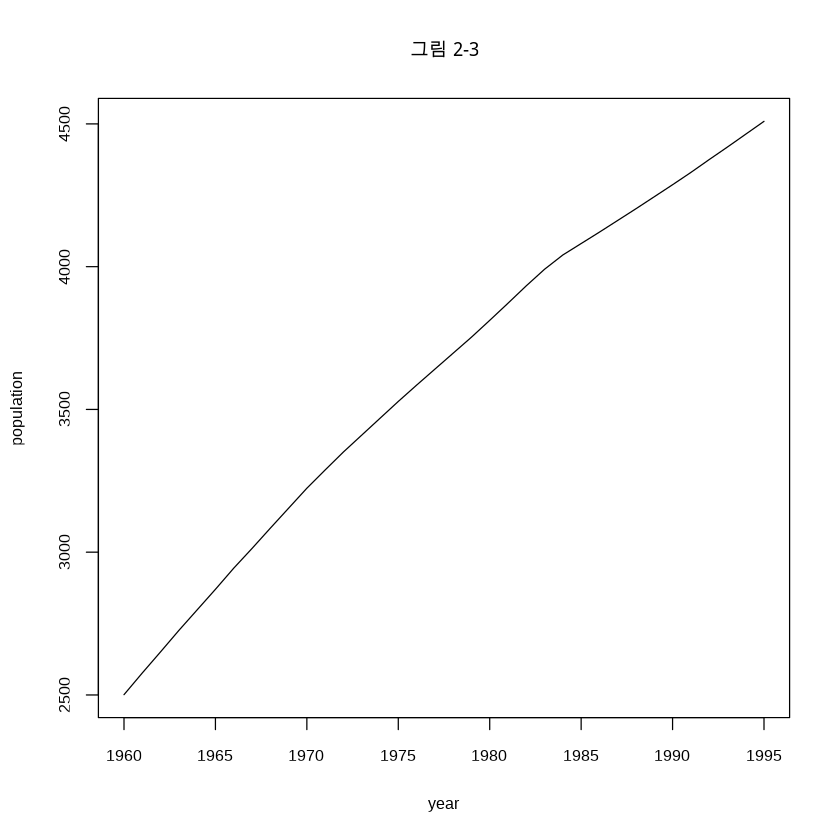

In [16]:
# 타임시리즈 데이터 그리기
ts.plot(pop, xlab="year", ylab="population", main="그림 2-3")

In [18]:
m1 <- lm(pop ~ t)

In [19]:
m1 #^Zt=2559.39+57.01t, t = 1, 2, 3, ..., 36


Call:
lm(formula = pop ~ t)

Coefficients:
(Intercept)            t  
    2559.39        57.01  


In [23]:
# Example 2.1 : 선형모형 적합
install.packages('lmtest') #library for Durbin-Watson

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [24]:
library('lmtest')

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [29]:
dwtest(m1)

#H0: p1 = 0 corr이 없음
#H1: p1 != 0 corr이 있음
#p값 < a=0.05 -> H0 기각
#-> H0 기각, 독립 아님


	Durbin-Watson test

data:  m1
DW = 0.041645, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [26]:
summary(m1)
#Residuals: 잔차


Call:
lm(formula = pop ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-115.40  -48.30   16.87   54.37   63.29 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2559.3889    20.0385  127.72   <2e-16 ***
t             57.0135     0.9444   60.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.87 on 34 degrees of freedom
Multiple R-squared:  0.9908,	Adjusted R-squared:  0.9905 
F-statistic:  3644 on 1 and 34 DF,  p-value: < 2.2e-16


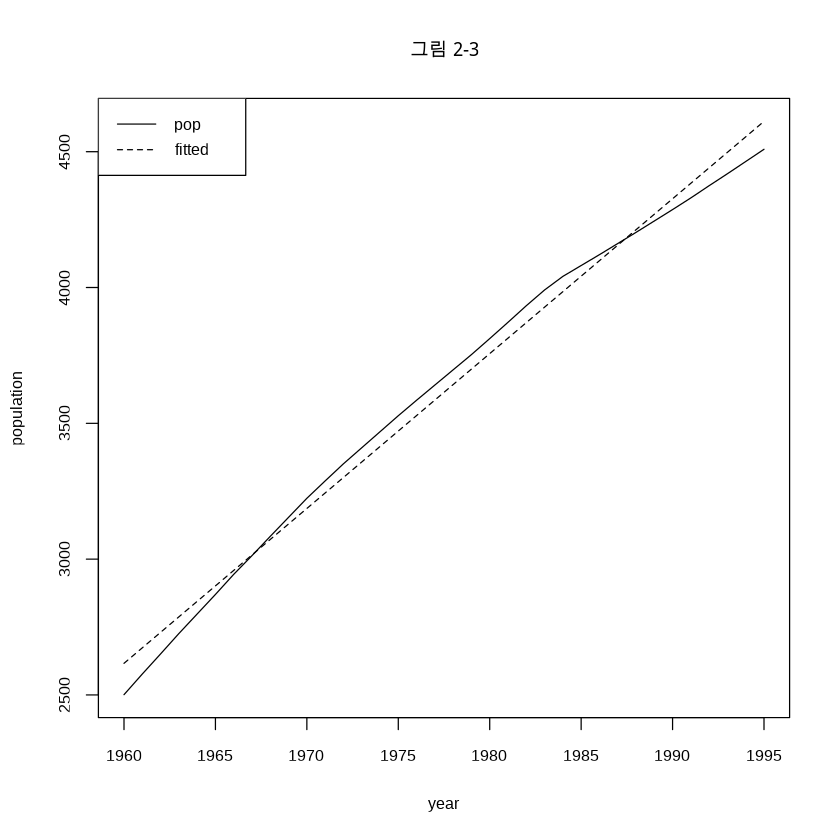

In [27]:
ts.plot(pop, fitted(m1), lty=1:2, xlab="year", ylab="population", main="그림 2-3") # 두 개의 시계열 그려줌
# lty: line type : 첫번째 거 실선, 두번째 거 점선
legend("topleft", legend=c("pop", "fitted"), lty=1:2)

ts.plot(resid(m1), type="o") #m1의 잔차 type o:
#. xlab="year", ylab="residual", main

In [31]:
m2 <- lm(pop ~ t+t2)
summary(m2)

# ^Zt=2421.5 + 788.8t - 0.59t^2
# r, p값, *** -> 완전 퍼펙트


Call:
lm(formula = pop ~ t + t2)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.365  -4.779  -1.049   3.798  17.631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2421.49090    4.05820  596.69   <2e-16 ***
t             78.78688    0.50576  155.78   <2e-16 ***
t2            -0.58847    0.01326  -44.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.67 on 33 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 1.083e+05 on 2 and 33 DF,  p-value: < 2.2e-16


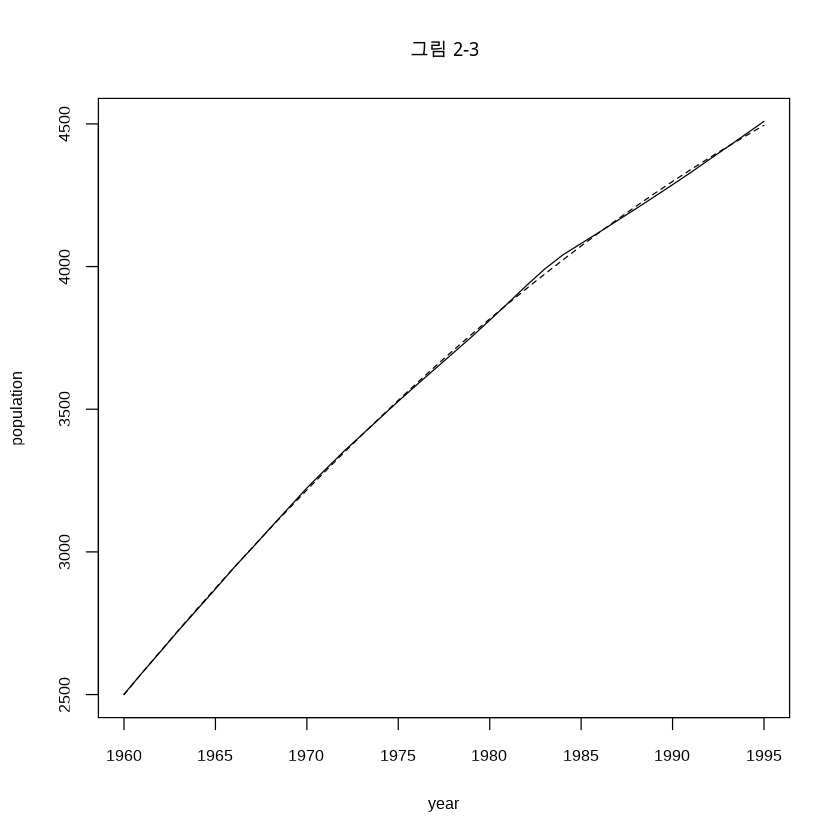

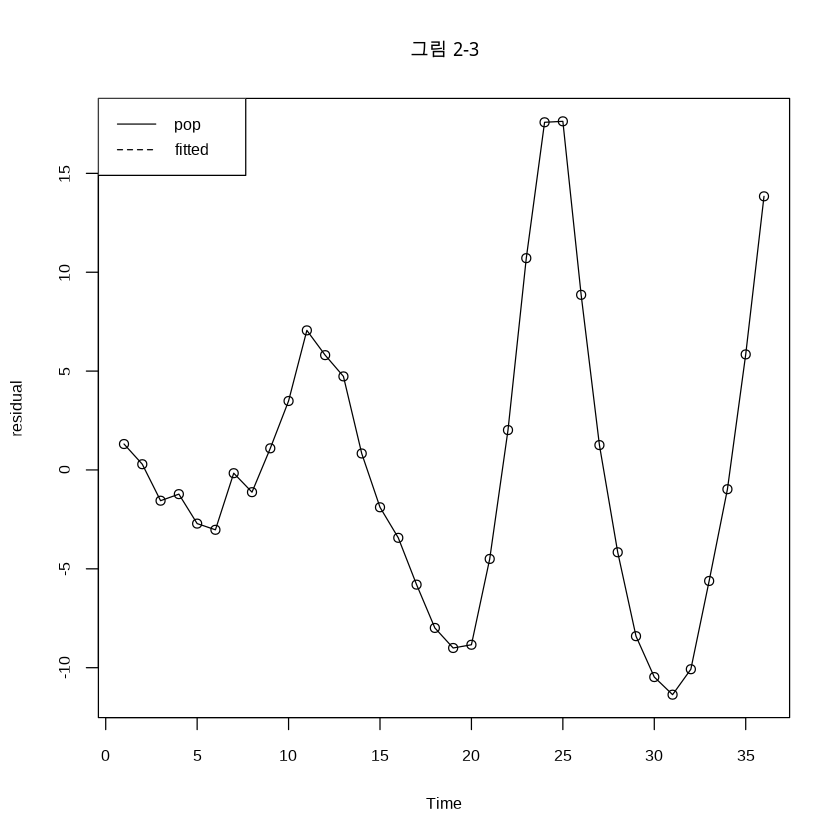

In [33]:
ts.plot(pop, fitted(m2), lty=1:2, xlab="year", ylab="population", main="그림 2-3")
ts.plot(resid(m2), type="o", ylab="residual", main="그림 2-3") #이분산성


In [35]:
lnpop <- log(pop)
m3 <- lm(lnpop ~ t+t2)
dwtest(m3)
summary(m3)

#^Zt = 7.8 + 0.03t - 0.0003t^2, t = 1, 2, ... , 36
# 굉장히 유의


	Durbin-Watson test

data:  m3
DW = 0.16493, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



Call:
lm(formula = lnpop ~ t + t2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009306 -0.003520 -0.000374  0.003284  0.010159 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.807e+00  2.360e-03 3307.25   <2e-16 ***
t            2.740e-02  2.942e-04   93.14   <2e-16 ***
t2          -3.004e-04  7.712e-06  -38.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004461 on 33 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9993 
F-statistic: 2.664e+04 on 2 and 33 DF,  p-value: < 2.2e-16


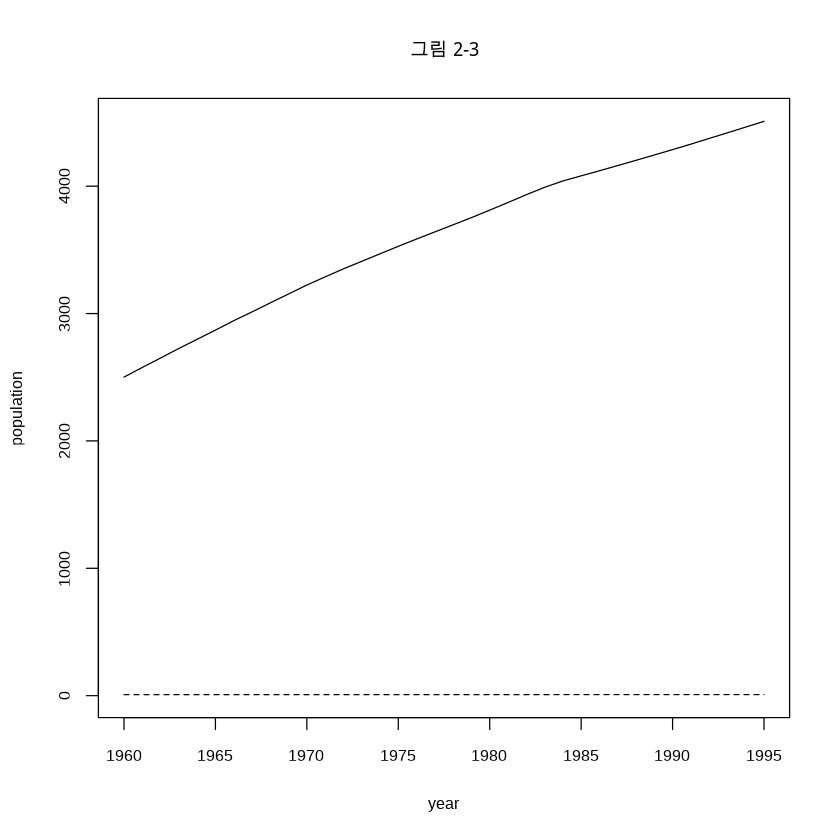

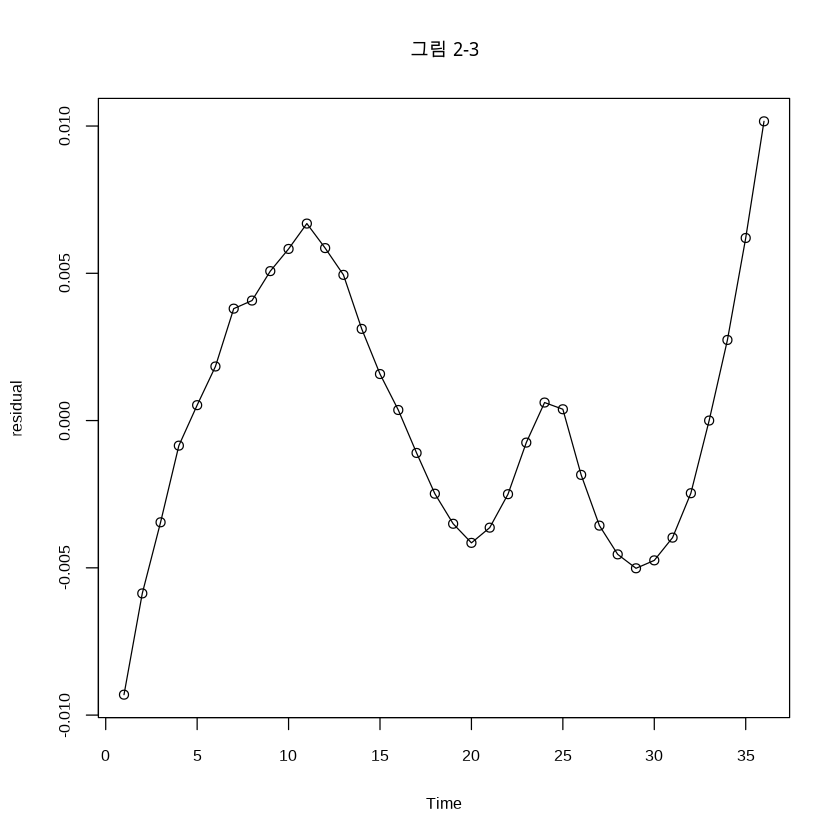

In [36]:
ts.plot(pop, fitted(m3), lty=1:2, xlab="year", ylab="population", main="그림 2-3")
ts.plot(resid(m3), type="o", ylab="residual", main="그림 2-3") #이분산성 해소

In [38]:
# 예제 2.2 백화점 84.1~88.12 n-60
# 추세, 계절, 불규칙
# m1  Zt = b0 + b1 + b2I1t + ... + b13I12t + et
# 공산성 이슈 -> 결과가 안 나옴 (빼는 게 기준이 됨 -> 1월을 빼자)
z <- scan("/content/depart.txt")
dep <- ts(z, frequency=12, start=c(1984.1))

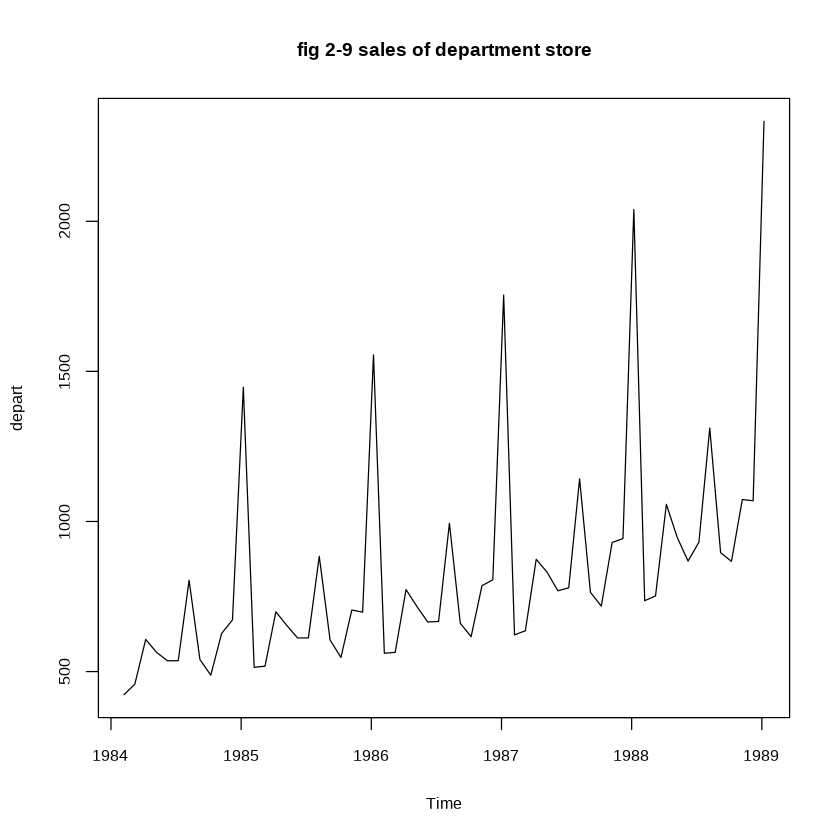

In [39]:
ts.plot(dep, ylab="depart", main="fig 2-9 sales of department store")